In [23]:
%config IPCompleter.greedy=True
import ROOT
import matplotlib.pyplot as plt

from DataFormats.FWLite import Events, Handle
events = Events("RootFiles/monoZprime_CP5_withWeights.root")
genJetsHandle = Handle("std::vector<reco::GenJet>")

In [24]:
num_constituents = []
pt1_frac = []
pt2_frac = []
pt3_frac = []
pt123_frac = []
for i, event in enumerate(events):
    event.getByLabel ("ak4GenJetsNoNu", genJetsHandle)
    genJets = genJetsHandle.product()
    leading_jet = genJets.at(0)
    if leading_jet.pt() < 200:
        continue
    constits = leading_jet.getJetConstituentsQuick()
    num_constituents.append(constits.size())
    pt123 = 0
    for j, cand in enumerate(constits):
        if j < 1:
            pt1_frac.append(cand.pt()/leading_jet.pt())
            pt123 += cand.pt()
        elif j < 2: 
            pt2_frac.append(cand.pt()/leading_jet.pt())
            pt123 += cand.pt()
        elif j < 3:
            pt3_frac.append(cand.pt()/leading_jet.pt())
            pt123 += cand.pt()
            pt123_frac.append(pt123/leading_jet.pt())
            break

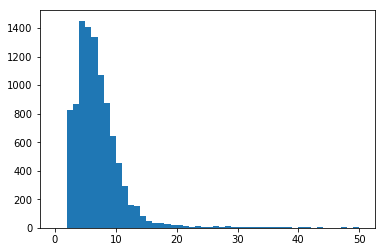

In [6]:
plt.hist(num_constituents, bins=50, range=(0,50));

NameError: name 'num_daughters' is not defined

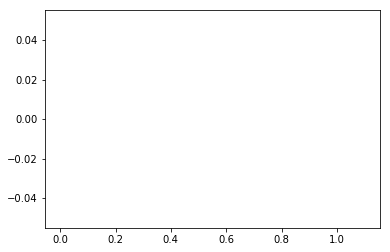

In [22]:
plt.hist(pt1_frac, bins=60, range=(0,1.1));

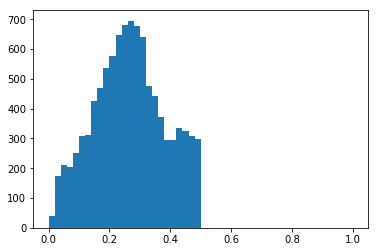

In [18]:
plt.hist(pt2_frac, bins=50, range=(0,1));

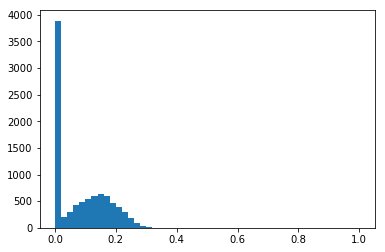

In [11]:
plt.hist(pt3_frac, bins=50, range=(0,1));

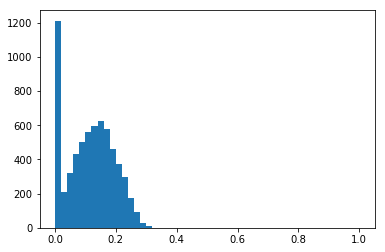

In [15]:
plt.hist(pt123_frac, bins=50, range=(0,1));